In [45]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

## Wages

### Merge File

In [86]:
countryMapping = {
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BRA': 'Brazil',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CHN': 'China', 'COL': 'Colombia',
    'CRI': 'Costa Rica', 'CZE': 'Czech Republic', 'DEU': 'Germay', 'DNK': 'Denmark', 'ESP': 'Spain',
    'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'United Kingdom', 'GRC': 'Greece',
    'HUN': 'Hungary', 'IDN': 'Indonesia', 'IND': 'India', 'IRL': 'Ireland', 'ISL': 'Iceland',
    'ISR': 'Isreal', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia', 'SVK': 'Slovak Republic',
    'SVN': 'Slovenia', 'SWE': 'Sweden', 'TUR': 'Turkey', 'USA': 'United States of America', 'ZAF': 'South Africa'
}

In [89]:
wage_file = '../avg_wages.csv'
suicide_file = '../Adjusted Suicide Rate(fillna).csv'
df_wage = pd.read_csv(wage_file)
df_suicide = pd.read_csv(suicide_file)

new_pd = pd.DataFrame(columns=['country', 'year', 'wage', 'cor'])

# create new_pd to store mappedCountry from df_wage
for index,row in df_wage.iterrows():
    new_pd = new_pd.append({'country': countryMapping[row['LOCATION']], 'year': row['TIME'], 'wage': row['Value']}, ignore_index=True)


In [90]:
print(df_wage.LOCATION.unique().shape)
new_pd.head()

(35,)


,country,year,wage,cor
0,Australia,1990,36682.942425,NaN
1,Australia,1991,36776.247678,NaN
2,Australia,1992,37692.129358,NaN
3,Australia,1993,38112.690279,NaN
4,Australia,1994,38488.116634,NaN


In [91]:
df_suicide.head()

,country,year,suicide_rate
0,Albania,1979,2.721614
1,Albania,1980,2.734478
2,Albania,1981,2.747342
3,Albania,1982,2.760206
4,Albania,1983,2.773070


In [92]:
# convert type
print(df_suicide['country'].dtype,df_suicide['year'].dtype, new_pd['country'].dtype, new_pd['year'].dtype)

# Before merge, joined column should be converted to same data type
new_pd['year'] = new_pd['year'].apply(int)

# or do following
# new_pd['year'] = new_pd['year'].astype(df_suicide['year'].dtype)

print(new_pd['year'].dtype, df_suicide['year'].dtype)

object int64 object object
int64 int64


In [93]:
# merge
df_merge = pd.merge(df_suicide, new_pd, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

df_merge.head()

,country,year,suicide_rate,wage,cor
0,Australia,1990,12.2,36682.942425,NaN
1,Australia,1991,12.5,36776.247678,NaN
2,Australia,1992,12.1,37692.129358,NaN
3,Australia,1993,10.8,38112.690279,NaN
4,Australia,1994,12.0,38488.116634,NaN


In [94]:
# remove NaN
suicide_rates = df_merge[(df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
wages = df_merge[(df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].wage.values

print(suicide_rates[:3])
print(wages[:3])

# reshape doesn't change original data
wages.reshape(-1,1)[:3]

[12.2 12.5 12.1]
[36682.94242455 36776.24767829 37692.12935818]


array([[36682.94242455],
       [36776.24767829],
       [37692.12935818]])

### Correlation

In [95]:
# Correlation
cor, p = pearsonr(wages, suicide_rates)
print(cor, p)
print(len(df_merge.country.unique()))

-0.6282085337077356 0.00045039592251178585
30


In [96]:
pd_suicide_rate_wage_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge.country.unique():
    suicide_rates = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
    wages = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].wage.values
    cor, p = pearsonr(wages, suicide_rates)
#     print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_wage_cor = pd_suicide_rate_wage_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)
    
    

In [97]:
pd_suicide_rate_wage_cor

,country,cor,p
0,Australia,-0.628209,4.503959e-04
1,Austria,-0.979314,7.234952e-19
2,Belgium,-0.470412,1.327819e-02
3,Canada,-0.925300,5.039862e-12
4,Chile,0.571625,6.786564e-03
5,Czech Republic,-0.832873,1.509612e-06
6,Denmark,-0.951460,2.656639e-14
7,Estonia,-0.944564,3.931402e-11
8,Finland,-0.952206,2.197710e-14
9,France,-0.954890,1.083002e-14


In [98]:
large = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor >= 0.7)]
small = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor <= 0.3) & (pd_suicide_rate_wage_cor.cor >=0)]
median = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor < 0.7) & (pd_suicide_rate_wage_cor.cor > 0.3)]

m_large = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor <= -0.7)]
m_small = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor >= -0.3) & (pd_suicide_rate_wage_cor.cor < 0)]
m_median = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p <= 0.05) & (pd_suicide_rate_wage_cor.cor > -0.7) & (pd_suicide_rate_wage_cor.cor < -0.3)]

rest = pd_suicide_rate_wage_cor[(pd_suicide_rate_wage_cor.p > 0.05)]
print(rest.shape)
print(large.shape, m_large.shape, small.shape, m_small.shape, median.shape, m_median.shape)
print(large.country,'\n', m_large.country, '\n', small.country,'\n', m_small.country,'\n', median.country,'\n', m_median.country)
print(rest.country)



(5, 3)
(0, 3) (17, 3) (0, 3) (0, 3) (3, 3) (5, 3)
Series([], Name: country, dtype: object) 
 1            Austria
3             Canada
5     Czech Republic
6            Denmark
7            Estonia
8            Finland
9             France
11           Hungary
14             Italy
16            Latvia
17         Lithuania
18        Luxembourg
22            Norway
25          Slovenia
27            Sweden
28       Switzerland
29    United Kingdom
Name: country, dtype: object 
 Series([], Name: country, dtype: object) 
 Series([], Name: country, dtype: object) 
 4      Chile
15     Japan
19    Mexico
Name: country, dtype: object 
 0       Australia
2         Belgium
10         Greece
21    New Zealand
26          Spain
Name: country, dtype: object
12        Iceland
13        Ireland
20    Netherlands
23         Poland
24       Portugal
Name: country, dtype: object


In [99]:
pd_suicide_rate_wage_cor.to_csv("suicide_rate_wages_cor.csv",index = False)

### Regression

In [63]:
# Regression
reg = linear_model.LinearRegression()

# make wages to 1 dimension (wages.reshape(-1)), and then shape to 1 column shape
reg.fit(wages.reshape(-1,1), suicide_rates)

# slope and intercept
print(reg.coef_, reg.intercept_)

[-6.39919267e-05] 8.98136969602467


In [64]:
reg.predict([[1990]])

array([8.85402576])

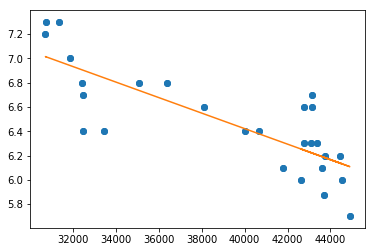

In [65]:
line = reg.coef_*wages.reshape(-1, 1)+reg.intercept_

plt.scatter(wages, suicide_rates)
plt.plot(wages.reshape(-1,1), suicide_rates,'o', wages.reshape(-1,1), line)
plt.show()


In [66]:
reg.score(wages.reshape(-1,1), suicide_rates)

0.6353749514097657

## Population density

### merge file

In [69]:
pop_file = '../pop_dens_world_bank.csv'
suicide_file = '../Adjusted Suicide Rate(fillna).csv'
df_pop = pd.read_csv(pop_file, skiprows=4)
df_suicide = pd.read_csv(suicide_file)

# countries = [
#     'AUS', 'AUT', 'BEL', 'BRA',
#     'CAN', 'CHE', 'CHL', 'CHN', 'COL',
#     'CRI', 'CZE', 'DEU', 'DNK', 'ESP',
#     'EST', 'FIN', 'FRA', 'GBR', 'GRC',
#     'HUN', 'IDN', 'IND', 'IRL', 'ISL',
#     'ISR', 'ITA', 'JPN', 'KOR', 'LTU',
#     'LUX', 'LVA', 'MEX', 'NLD', 'NOR',
#     'NZL', 'POL', 'PRT', 'RUS', 'SVK',
#     'SVN', 'SWE', 'TUR', 'USA', 'ZAF'
# ]

# # filter out unnecessary country district
# df_pop_filtered = df_pop[df_pop['METRO_ID'].isin(countries)]

# new_pd = pd.DataFrame(columns=['country', 'year', 'type', 'value', 'cor'])

# # create new_pd to store mappedCountry from df_wage
# for index,row in df_pop_filtered.iterrows():
#     new_pd = new_pd.append({'country': countryMapping[row['METRO_ID']], 'year': row['TIME'], 'type': row['VAR'], 'value': row['Value']}, ignore_index=True)

# transpose dataset from world bank
new_pd = pd.DataFrame(columns=['country', 'year', 'value', 'cor'])
for index, row in df_pop.iterrows():
    for year in range(1961, 2017):
        new_pd = new_pd.append({'country': row['Country Name'], 'year': year, 'value': row[str(year)]}, ignore_index=True)
        
        

In [70]:
# print(df_pop_filtered.METRO_ID.unique().shape)
print(new_pd.country.unique().shape)
new_pd.head()

(264,)


,country,year,value,cor
0,Aruba,1961,307.988889,NaN
1,Aruba,1962,312.361111,NaN
2,Aruba,1963,314.972222,NaN
3,Aruba,1964,316.844444,NaN
4,Aruba,1965,318.666667,NaN


In [71]:
df_suicide.head()

,country,year,suicide_rate
0,Albania,1979,2.721614
1,Albania,1980,2.734478
2,Albania,1981,2.747342
3,Albania,1982,2.760206
4,Albania,1983,2.773070


In [72]:
# convert type
print(df_suicide['country'].dtype,df_suicide['year'].dtype, new_pd['country'].dtype, new_pd['year'].dtype)

# Before merge, joined column should be converted to same data type
# new_pd['year'] = new_pd['year'].apply(int)

# or do following
new_pd['year'] = new_pd['year'].astype(df_suicide['year'].dtype)

print(new_pd['year'].dtype, df_suicide['year'].dtype)

object int64 object object
int64 int64


In [73]:
# merge
df_merge = pd.merge(df_suicide, new_pd, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

df_merge.head()

,country,year,suicide_rate,value,cor
0,Albania,1979,2.721614,95.541314,NaN
1,Albania,1980,2.734478,97.518139,NaN
2,Albania,1981,2.747342,99.491095,NaN
3,Albania,1982,2.760206,101.615985,NaN
4,Albania,1983,2.773070,103.794161,NaN


In [75]:
# devide pop and pop_dens and remove NaN
# suicide_rates_pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
# pop = df_merge[(df_merge.type == 'POP') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].value.values

# suicide_rates_pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].suicide_rate.values
# pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == 'Australia') & df_merge['suicide_rate'].notnull()].value.values

# print(suicide_rates_pop_dens.shape)
# print(pop.shape)
# print(pop_dens.shape)

### Correlation

In [85]:
# Correlation
cor, p = pearsonr(pop, suicide_rates_pop)
print(cor, p)
print(len(df_merge.country.unique()))

-0.305895510850681 0.2875052196752849
76


In [78]:
pd_suicide_rate_pop_dens_cor = pd.DataFrame(columns=['country', 'cor', 'p'])

for country in df_merge.country.unique():
#     suicide_rates_pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
#     pop_dens = df_merge[(df_merge.type == 'POP_DENS') & (df_merge.country == country) & df_merge['suicide_rate'].notnull()].value.values
    suicide_rates_pop_dens = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].suicide_rate.values
    pop_dens = df_merge[(df_merge.country == country) & df_merge['suicide_rate'].notnull()].value.values
    cor, p = pearsonr(pop_dens, suicide_rates_pop_dens)
#     print("Country: %s, cor:%f, p:%f"%(country, cor, p))
    pd_suicide_rate_pop_dens_cor = pd_suicide_rate_pop_dens_cor.append({'country': country, 'cor': cor, 'p': p}, ignore_index=True)
    
    

In [79]:
pd_suicide_rate_pop_dens_cor

,country,cor,p
0,Albania,0.018828,9.106671e-01
1,Argentina,0.216133,1.924738e-01
2,Armenia,0.488656,1.852903e-03
3,Aruba,0.396719,1.366383e-02
4,Australia,-0.472288,2.754609e-03
5,Austria,-0.968260,2.859634e-23
6,Azerbaijan,-0.932852,1.539755e-17
7,Bahrain,-0.387078,1.635823e-02
8,Barbados,-0.518992,8.421397e-04
9,Belarus,0.240837,1.452377e-01


In [80]:
large = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor >= 0.7)]
small = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor <= 0.3) & (pd_suicide_rate_pop_dens_cor.cor >=0)]
median = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor < 0.7) & (pd_suicide_rate_pop_dens_cor.cor > 0.3)]

m_large = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor <= -0.7)]
m_small = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor >= -0.3) & (pd_suicide_rate_pop_dens_cor.cor < 0)]
m_median = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p <= 0.05) & (pd_suicide_rate_pop_dens_cor.cor > -0.7) & (pd_suicide_rate_pop_dens_cor.cor < -0.3)]

rest = pd_suicide_rate_pop_dens_cor[(pd_suicide_rate_pop_dens_cor.p > 0.05)]
print(rest.shape)
print(large.shape, m_large.shape, small.shape, m_small.shape, median.shape, m_median.shape)
print(large.country,'\n', m_large.country, '\n', small.country,'\n', m_small.country,'\n', median.country,'\n', m_median.country)
print(rest.country)


(17, 3)
(10, 3) (21, 3) (0, 3) (0, 3) (17, 3) (11, 3)
12         Brazil
14       Bulgaria
16          Chile
19        Croatia
34        Hungary
47          Malta
49         Mexico
54       Paraguay
55    Philippines
74        Uruguay
Name: country, dtype: object 
 5               Austria
6            Azerbaijan
13    Brunei Darussalam
15               Canada
20                 Cuba
22              Denmark
24          El Salvador
26              Finland
27               France
29              Germany
38                Italy
46             Maldives
52               Norway
62            Singapore
63             Slovenia
65            Sri Lanka
67               Sweden
68          Switzerland
71         Turkmenistan
73       United Kingdom
75           Uzbekistan
Name: country, dtype: object 
 Series([], Name: country, dtype: object) 
 Series([], Name: country, dtype: object) 
 2                 Armenia
3                   Aruba
11                 Belize
17               Colombia
18        

In [82]:
pd_suicide_rate_pop_dens_cor.to_csv("suicide_rate_pop_dens_cor.csv", index=False)